---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 5 

---

Please write your full name here
- **Name** : Ibrahim Mohamed Ibrahim

# Clustering

In this assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [228]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Question 0
Set random seed to 47

In [230]:
kmeans = KMeans(random_state=47)

# Question 1
Scatter plot the dataset

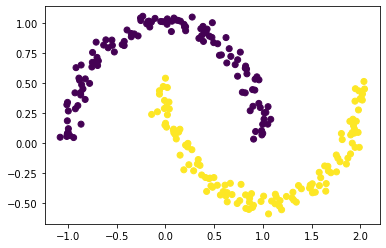

In [231]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Question 2
In your opinion, how well will K-Means perform on the above dataset? Explain.

ANSWER:
Because the dataset is not linearly separable, K-Means may not perform well. Because the data points are formed like two interlocking half circles, there are no apparent distinctions between the two groups. K-Means works best when the data is well-separated into clusters that can be distinguished by their distance from one another.

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train SKlearn KMeans model using "k = 2".
4. Scatter plot the data after clustering with colors
5. **Comment on the results.**

ANSWER:

C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

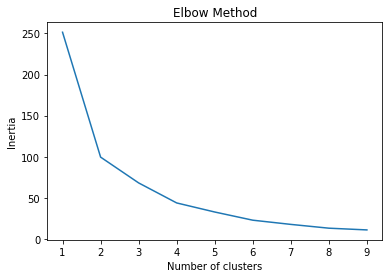

In [232]:
kmeans_inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=47)
    kmeans.fit(X)
    kmeans_inertias.append(kmeans.inertia_)


plt.plot(range(1, 10), kmeans_inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [233]:
kmeans = KMeans(n_clusters=2, random_state=47)
kmeans.fit(X)

C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=47)

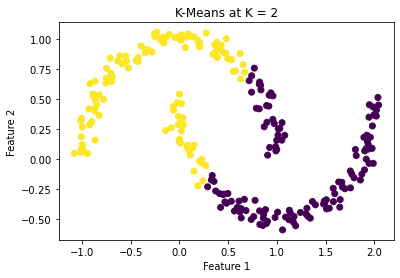

In [234]:
labels = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('K-Means at K = 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Comments
As we expected above the K-Means didn't perform well on the this dataset as we see here in the plot because the clusters are not well separated. and there are some points that are not in the right cluster due to the fact that the data is not linearly separable. so we can say that K-Means is not the best algorithm for this dataset. as it is not suitable for non-linear data.

- Try DBSCAN algorithm on the same data with eps = 0.3
- Scatter plot the resulting clusters

In [235]:
dbscan = DBSCAN(eps=0.3)
dbscan_labels = dbscan.fit_predict(X)

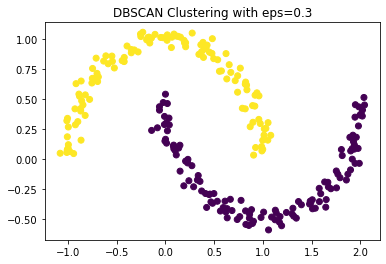

In [236]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering with eps=0.3")
plt.show()

**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

ANSWER:
The DBSCAN Algorithm is more accurate and classified the data correctly while kmeans faild to do such so. we got this results as DBSCAN is density based and able to capture more complex relationships between the data points. while KMeans is distance based and it is not suitable for non-linear data. so it is not the best algorithm for this dataset. beside it is sensitive to outliers and noise. so it is unable to capture the underlying structure of the data in the given dataset and it assumes that clusters is spherical and have equal variance along all dimensions.

# Question 4
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm.
4. Comment on the following
    * Why do kmeans fail to cluster such data?



ANSWER:

In [237]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


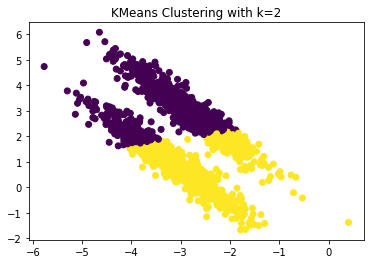

In [238]:
# Run KMeans with k=2
kmeans_q4 = KMeans(n_clusters=2, random_state=0).fit(X_aniso)

# Plot the results
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_q4.labels_)
plt.title('KMeans Clustering with k=2')
plt.show()

As KMeans assumes that the clusters are spherical, of equal size and density. KMeans doesn't work well in the case of produced data with anisotropic distribution which look like elongated clusters with differing variances along various axes, since it is sensitive to the shape and size of the clusters. so it is unable to capture the underlying structure of the data in the given dataset since it assumes that the clusters are circular and have equal variance along all dimensions. As a result, KMeans may misclassify certain points and fail to successfully separate the two clusters.

# Question 5
Write your own K-means clustering from scratch, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [239]:
from scipy.spatial.distance import cdist

class MyKMeans:
    def __init__(self, clusters_number=2, max_iter=300):
        self.clusters_number = clusters_number
        self.max_iter = max_iter
        self.labels_ = None
        self.cluster_centers_ = None

    def fit(self, X):
        best_sse = np.inf
        best_centers = None
        best_labels = None

        for i in range(self.clusters_number):
            # Initialization
            cluster_centers = X[np.random.choice(X.shape[0], self.clusters_number, replace=False)]

            for j in range(self.max_iter):
                # Assigning labels to each data point based on the cluster centers
                distances = cdist(X, cluster_centers, 'euclidean')
                labels = np.argmin(distances, axis=1)

                # Updating cluster centers
                for k in range(self.clusters_number):
                    cluster_centers[k] = np.mean(X[labels == k], axis=0)

                # Calculate SSE
                sse = np.sum((X - cluster_centers[labels]) ** 2)

                # Check if SSE has converged
                if j > 0 and sse == prev_sse:
                    break
                prev_sse = sse

            # Check if this initialization yielded a lower SSE than previous best
            if sse < best_sse:
                best_sse = sse
                best_centers = cluster_centers
                best_labels = labels

        self.cluster_centers_ = best_centers
        self.labels_ = best_labels

    def predict(self, X):
        distances = cdist(X, self.cluster_centers_, 'euclidean')
        return np.argmin(distances, axis=1)

# Question 6
For the following dataset:

In [240]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


- Scatter plot the data **without** coloring the points using labels. 
- How many clusters do you see?

ANSWER:

Text(0, 0.5, 'Feature 2')

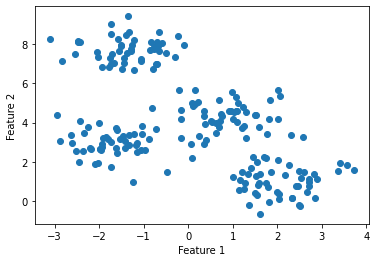

In [241]:
plt.scatter(X[:, 0], X[:, 1])

# Set x and y axis labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

**I see 4 clusters.**

# Question 7

- Use sklearn kmeans to cluster the ABOVE data with k = the number you chose in the above question
    - Print the clusters centers
    - Scatter plot the data and use the labels **predicted** by the model to color the points --> you should have as many colors in the plot as clusters
    - On the same plot, show the cluster centers

C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster centers:
[[ 0.86008475  4.31501411]
 [-1.36512238  7.70188306]
 [ 2.07464749  0.9869902 ]
 [-1.70639178  2.9104771 ]]


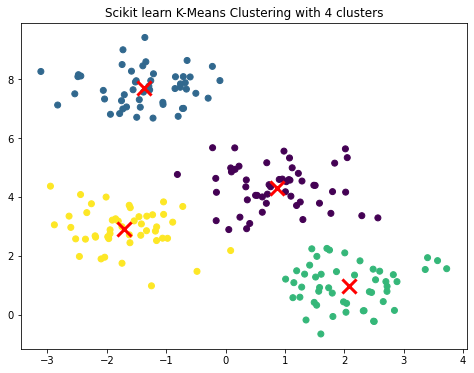

In [242]:
kmeans_q7 = KMeans(n_clusters=4, random_state=47)
kmeans_q7.fit(X)

# print the cluster centers
print("Cluster centers:")
print(kmeans_q7.cluster_centers_)

# scatter plot with predicted labels and cluster centers
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:, 0], X[:, 1], c=kmeans_q7.labels_)
ax.scatter(kmeans_q7.cluster_centers_[:, 0], kmeans_q7.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_title(f'Scikit learn K-Means Clustering with 4 clusters')
plt.show()

### Testing my Kmeans Class

Cluster centers:
[[-1.70639178  2.9104771 ]
 [ 2.07464749  0.9869902 ]
 [ 0.86008475  4.31501411]
 [-1.36512238  7.70188306]]


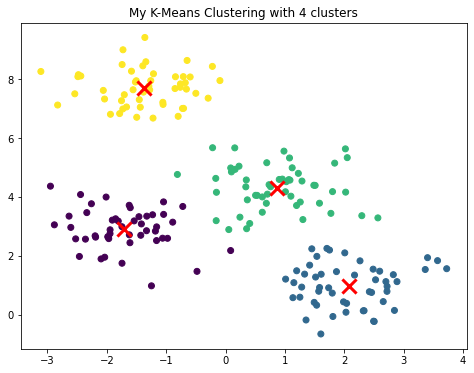

In [243]:
mykmeans = MyKMeans(clusters_number=4)
mykmeans.fit(X)

# print the cluster centers
print("Cluster centers:")
print(mykmeans.cluster_centers_)

# scatter plot with predicted labels and cluster centers
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:, 0], X[:, 1], c=mykmeans.labels_)
ax.scatter(mykmeans.cluster_centers_[:, 0], mykmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_title(f'My K-Means Clustering with 4 clusters')
plt.show()


- Calculate the accuracy score between kmeans prediction and the true blobs labels

In [244]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, kmeans_q7.labels_)
print("Accuracy score:", accuracy)

Accuracy score: 0.25


- Why is the accuracy so low?

ANSWER:
Because KMeans is an unsupervised learning technique and does not utilise the true labels to cluster the data, the accuracy between the KMeans prediction and the true blob labels is poor. It seeks to reduce the separation between the cluster centroids and the points. Therefore, it's possible that the cluster assignments don't always correspond to the actual labels, particularly if the data aren't well-separated or if clusters overlap in some areas. Although the KMeans model in this instance was able to capture the data's broad structure, it incorrectly assigned the points to the appropriate clusters, leading to a poor accuracy score.

# Question 8


- Write a function that takes the number of clusters, the true labels, and the model predictions
- The function should return a list **new labels** with length = number of clusters
- The function should modify the predicted label of each cluster to be the **mode** (most common **true** label) among the data points in the cluster
- Pseudocode:
    - For each predicted cluster:
        - Calculate mode of true labels of all points within the cluster
        - The mode is the **new label** for this cluster


In [245]:
def relabel(clusters_number, true_labels, predicted_labels):
    new_labels = np.zeros(clusters_number)
    for i in range(clusters_number):
        cluster_indices = np.where(predicted_labels == i)[0]
        cluster_labels = true_labels[cluster_indices]
        new_labels[i] = np.argmax(np.bincount(cluster_labels))

    return new_labels.astype(int)

In [246]:
n_clusters = 4
true_labels = y
pred_labels = kmeans_q7.labels_

new_labels = relabel(n_clusters, true_labels, pred_labels)
assert len(new_labels) == n_clusters

- Calculate the accuracy score of new labels for **ALL** data after relabeling data

In [247]:
mapped_labels = []
for label in pred_labels:
    mapped_labels.append(new_labels[label])

In [248]:
accuracy_after_relabel = accuracy_score(true_labels, mapped_labels)
print("Accuracy score is", accuracy_after_relabel)

Accuracy score is 0.99


# Question 9
Write your own K-medoids clustering, where the Euclidian distance is used to evaluate the distance/ similarity between the dataset. The input to this function should be:
- The number of clusters
- The dataset

The output should be:
- The list of cluster centers

In [249]:
from sklearn.metrics import pairwise_distances

class MyKMedoids:
    def __init__(self, n_clusters=2, max_iter=300):
        self.medoids = None
        self.medoids_indices = None
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.medoids_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.medoids = X[self.medoids_indices]

        for i in range(self.max_iter):
            labels = self.predict(X)
            old_medoids = np.copy(self.medoids_indices)
            for k in range(self.n_clusters):
                cluster_indices = np.where(labels == k)[0]
                distances = pairwise_distances(X[cluster_indices], X[cluster_indices], metric='euclidean')
                total_distances = np.sum(distances, axis=1)
                medoid_index = cluster_indices[np.argmin(total_distances)]
                self.medoids_indices[k] = medoid_index
                self.medoids[k] = X[medoid_index]
            if np.array_equal(old_medoids, self.medoids_indices):
                break

        self.labels_ = labels
        self.cluster_centers_ = self.medoids

    def predict(self, X):
        distances = pairwise_distances(X, self.medoids, metric='euclidean')
        return np.argmin(distances, axis=1)


- Apply YOUR k-medoids clustering algorithm with 4 clusters 
- Scatter Plot the points clusters along with the cluster center (use symbols to distinguish the cluster center from cluster point and the color codes to distinguish between the 4 clusters).

- Use the data in the following link: https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

In [250]:
data = pd.read_csv('./data/faithful.csv')
data = data.drop(columns=['Unnamed: 0'])

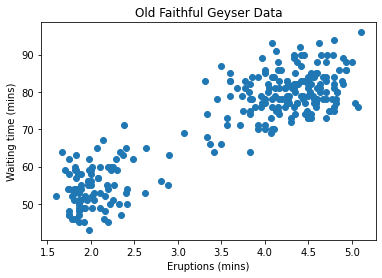

In [251]:
plt.scatter(data['eruptions'], data['waiting'])
plt.xlabel('Eruptions (mins)')
plt.ylabel('Waiting time (mins)')
plt.title('Old Faithful Geyser Data')
plt.show()

In [252]:
# Initialize My K-Medoids model with 4 clusters

my_kmedoids = MyKMedoids(n_clusters=4, max_iter=100)
# Fit the model to the data
my_kmedoids.fit(data.values)
# Get the cluster centers
centroids  = my_kmedoids.medoids
# Get the labels for the data
labels = my_kmedoids.predict(data.values)
# Add the cluster labels to the DataFrame
data['cluster'] = labels


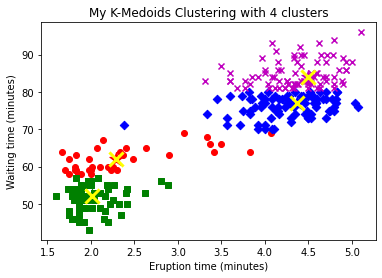

In [253]:
# Plot the data
colors = ['r', 'g', 'b', 'm']
markers = ['o', 's', 'D', 'x']
for i in range(4):
    cluster_data = data[data['cluster'] == i]
    plt.scatter(cluster_data['eruptions'], cluster_data['waiting'], c=colors[i], marker=markers[i])
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], marker='*', s=200)

plt.scatter(my_kmedoids.cluster_centers_[:, 0], my_kmedoids.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='yellow')
plt.title('My K-Medoids Clustering with 4 clusters')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.show()
